# Hvordan hente informasjon fra nettet ved hjelp av API

API står for **Application Programming interface**.

Måten det funker på er i korte trekk at man sender en forespørsel (request) til en nettside, og får tilbake den dataen man forespør.

Ved å kode denne forespørselen med python kan man hente data med et enkelt tastetrykk. 
Det kan derfor lønne seg å bruke tid på å kode hvis det er data som oppdateres jevnlig. 

F.eks. kan man kode et program som henter inn nyheter om markedet for et meglerhus hver morgen.
Da kan man på forhånd bestemme seg for hvilke type nyheter man ønsker, og kjøre programmet når man kommer på jobb på morgenen.



# API-konsoll

SSB har en egen konsoll som gjør det enklere å lage spørringer mot deres tabeller. https://data.ssb.no/api/v0/no/console

På denne konsollen kan man finne alle de tilgjengelige tabellene fra SSB. 

# Installere moduler

For å sette i gang med kodingen trenger vi å laste ned og importere python-pakkene **requests** , **pyjstat** og **matplotlib**

In [19]:
import requests
!pip install pyjstat
from pyjstat import pyjstat
import matplotlib as plt

# Gjennomføre en request


Vi angir først variabelen **URL** med nettadressen til tabellen vi ønsker å bruke. Nettadressen tar vi fra API-konsollen

Her bruker vi tabell for lakseeksport

In [12]:
URL = "https://data.ssb.no/api/v0/no/table/03024"

Deretter angir vi variabelen **query** med selve spørringen som vi henter fra API konsollen til SSB.

Det lønner seg å kun hente de variabelene man er ute etter. Dette kan man endre ved å justere spørringen

In [5]:
query = {
  "query": [
    {
      "code": "VareGrupper2",
      "selection": {
        "filter": "item",
        "values": [
          "01",
          "02"
        ]
      }
    },
    {
      "code": "ContentsCode",
      "selection": {
        "filter": "item",
        "values": ["Kilopris"] # Her ser vi at vi kun har hentet kiloprisen fra tabellen
      }
    },
    {
      "code": "Tid",
      "selection": {
        "filter": "all",
        "values": ["2023*"] # Her ser man at vi kun har hentet statistikken fra 2023
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }
}


Deretter poster vi spørringen med requests pakken

In [6]:
resultat = requests.post(URL, json = query)

Deretter legger vi resultatet i objektet dataset

In [15]:
ds = pyjstat.Dataset.read(resultat.text)

Så gjør vi at objektet blir en dataframe

In [16]:
df = ds.write('dataframe')

Deretter lager vi to separate dataframes, en for frossen laks, og en for fersk laks

In [17]:
df_fersk = df[df['varegruppe']=='Fersk oppalen laks']
df_frossen = df[df['varegruppe'] == 'Frosen oppalen laks']

Så plotter vi begge dataframes

<Axes: xlabel='uke'>

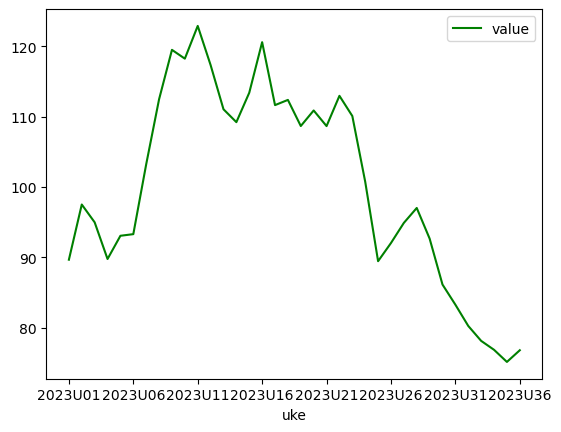

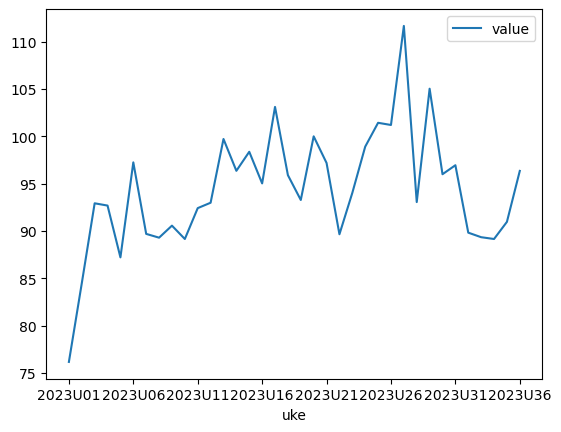

In [18]:
df_fersk.plot(x='uke',y='value',color = 'g')
df_frossen.plot(x='uke', y='value')